In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris(as_frame=True)

In [4]:
df = iris['data'].join(iris['target'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
import matplotlib.pyplot as plt

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

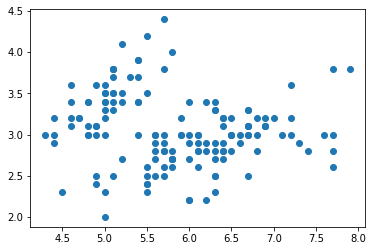

In [10]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

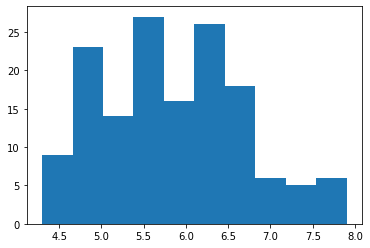

In [11]:
plt.hist(df['sepal length (cm)'])

## Döntési fa

In [12]:
from sklearn import tree

In [14]:
X, y = iris.data, iris.target

In [15]:
clf = tree.DecisionTreeClassifier()

In [16]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(390.6, 797.28, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(330.50769230769237, 652.3199999999999, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(450.69230769230774, 652.3199999999999, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(240.3692307692308, 507.35999999999996, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(120.1846153846154, 362.4, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(60.0923076923077, 217.43999999999994, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(180.27692307692308, 217.43999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(360.55384615384617, 362.4, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(300.4615384615385, 217.43999999999994, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(420.6461538461539, 217.43999999999994, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(360.553846153

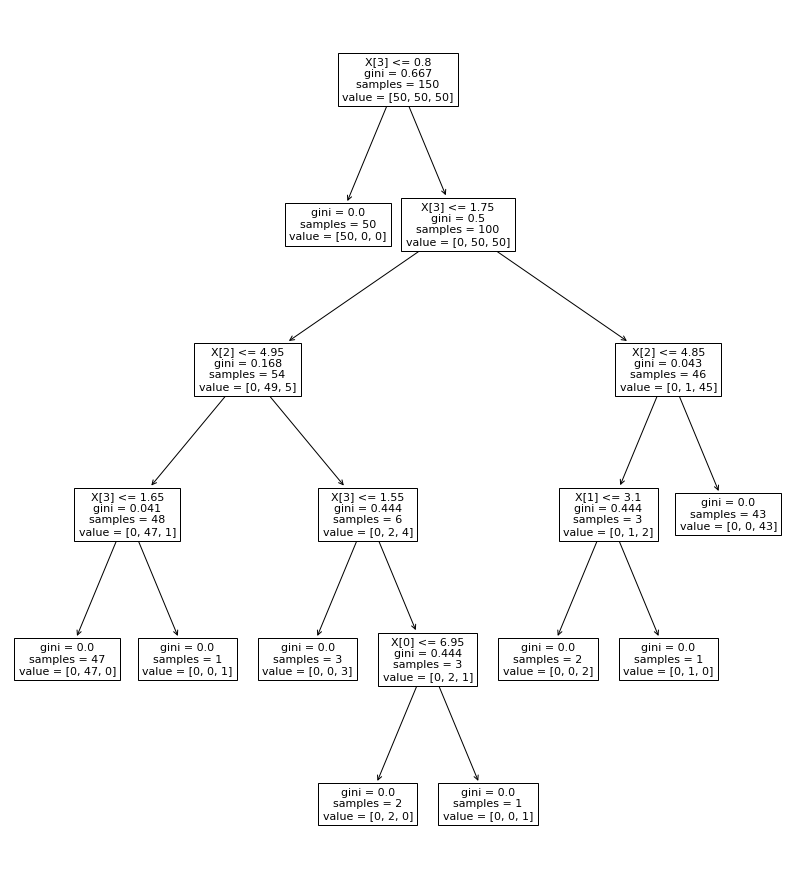

In [27]:
plt.figure(figsize=(14,16))
tree.plot_tree(clf)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data[iris.feature_names], iris.target, random_state=0)

In [28]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [29]:
score = clf.score(X_test, Y_test)
print(score)

0.9736842105263158
